In [ ]:
import os
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


In [ ]:
!pip install transformers torch pandas matplotlib numpy accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# prompt: login huffing face

from huggingface_hub import login

login(token=os.environ["HUGGINGFACE_TOKEN"])


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
llama3_pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-1B-Instruct")
llama3_pipe(messages)

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': "I'm an artificial intelligence model designed to assist and communicate with users in a helpful and informative way."}]}]

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")

In [ ]:
'''
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import os
import torch

def initialize_llama3(model_id="meta-llama/Llama-3.2-1B-Instruct", use_4bit=True):
    """
    Initialize Llama 3 model from Hugging Face.

    Args:
        model_id (str): Hugging Face model ID
        use_4bit (bool): Whether to use 4-bit quantization for memory efficiency

    Returns:
        tuple: (model, tokenizer, pipeline)
    """
    print(f"Loading {model_id}...")

    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(
        model_id,
        token=os.environ.get("HUGGINGFACE_TOKEN")
    )

    # Load model with quantization for efficiency
    if use_4bit:
        # Set up the quantization config
        quantization_config = {
            "bnb_4bit_compute_dtype": torch.bfloat16,
            "bnb_4bit_quant_type": "nf4",
            "bnb_4bit_use_double_quant": True,
        }
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            device_map="auto",
            torch_dtype=torch.bfloat16,
            token=os.environ.get("HUGGINGFACE_TOKEN"),
            quantization_config=quantization_config,  # Only pass quantization_config
        )
    else:
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            device_map="auto",
            torch_dtype=torch.bfloat16,
            token=os.environ.get("HUGGINGFACE_TOKEN"),
        )

    # Create a text generation pipeline
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_new_tokens=512,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        return_full_text=False
    )

    return model, tokenizer, pipe

# Initialize the model
model, tokenizer, llama3_pipe = initialize_llama3()
'''

In [ ]:
def query_llm(prompt, max_new_tokens=500, temperature=0.7):
    """
    Send a prompt to LLaMA 3 and get a response.

    Args:
        prompt (str): The prompt to send to the model
        max_new_tokens (int): Maximum length of the response
        temperature (float): Controls randomness (0-1)

    Returns:
        str: The model's response
    """
    try:
        # Format the prompt using LLaMA 3's chat template
        messages = [{"role": "user", "content": prompt}]
        formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

        # Generate the response
        result = llama3_pipe(
            formatted_prompt,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            top_p=0.9,
        )

        return result[0]['generated_text']
    except Exception as e:
        print(f"Error querying LLaMA 3: {e}")
        return None
def calculate_response_metrics(response):
    """
    Calculate basic metrics about the response.

    Args:
        response (str): The model's response

    Returns:
        dict: Dictionary of metrics
    """
    metrics = {
        "word_count": len(response.split()),
        "char_count": len(response),
        "sentence_count": response.count('. ') + response.count('! ') + response.count('? ')
    }
    return metrics


In [ ]:
# Test the LLaMA 3 setup
test_prompt = "What is prompt engineering?"
response = query_llm(test_prompt)

# Print the model's response
print("LLaMA 3 Response:")
print(response)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


LLaMA 3 Response:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

What is prompt engineering?<|eot_id|>assistant

Prompt engineering is a field of artificial intelligence (AI) that involves designing and optimizing the input prompts used to interact with AI systems, such as language models, chatbots, and other conversational AI applications. The goal of prompt engineering is to create effective and efficient prompts that elicit the desired response from the AI system, while also ensuring that the conversation remains coherent, relevant, and respectful.

Prompt engineering is a crucial aspect of natural language processing (NLP) and has applications in various domains, including:

1. **Chatbots and virtual assistants**: Prompt engineering is used to create effective chatbot interfaces that can understand and respond to user queries.
2. **Language translation an

In [ ]:
# Define a set of tasks for comparison
tasks = [
    "Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'",
    "Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'",
    "Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'",
    "Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'"
]
few_shot_examples = {
    "sentiment": [
        {"example": "The movie was fantastic and I enjoyed every minute.", "label": "Positive"},
        {"example": "The hotel room was dirty and the staff was rude.", "label": "Negative"},
        {"example": "While the price was high, the quality was worth it.", "label": "Positive"}
    ],
    "emotion": [
        {"example": "I just won the lottery!", "label": "Joy"},
        {"example": "My dog passed away yesterday.", "label": "Sadness"},
        {"example": "They didn't invite me to the party.", "label": "Disappointment"}
    ],
    "categorization": [
        {"example": "Local election results surprise analysts.", "label": "Politics"},
        {"example": "New movie breaks box office records.", "label": "Entertainment"},
        {"example": "Team wins championship for the third time.", "label": "Sports"}
    ],
    "fact_opinion": [
        {"example": "The Earth orbits around the Sun.", "label": "Fact"},
        {"example": "Summer is the best season of the year.", "label": "Opinion"},
        {"example": "Chocolate contains caffeine.", "label": "Fact"}
    ]
}


In [ ]:
def zero_shot_prompt(task):
    """
    Perform zero-shot prompting for a given task.

    Args:
        task (str): The task to perform

    Returns:
        str: The model's response
    """
    prompt = task
    return query_llm(prompt)
# Initialize results list
zero_shot_results = []

# Loop over all tasks and collect results
for task in tasks:
    response = zero_shot_prompt(task)
    zero_shot_results.append({
        "task": task,
        "response": response,
        "metrics": calculate_response_metrics(response)
    })

    # Print the result
    print(f"Task: {task}")
    print(f"Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'<|eot_id|>assistant

This review would be classified as negative. The reviewer starts by stating that the service was "terrible", which sets a negative tone. However, they then go on to express their appreciation for the food, saying it was "amazing", which contradicts the initial negative statement. This mixed review suggests that the reviewer had a poor experience, but the positive aspect of the food overshadowed the negative service.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'<|eot_id|>assistant

The emotion in this sentence is one of **frustration**. The speaker is expressing a sense of disappointment and discontent with their performance on the exam, and is using the phrase "I can't believe" to convey a sense of shock and surprise at their own failure.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'<|eot_id|>assistant

I would categorize this news headline as politics.

Task: Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Determine if this statement is a fact or opinion: 'Coffee is the best beverage for morning productivity.'<|eot_id|>assistant

This statement is an opinion. While opinions are subjective and can vary from 

In [ ]:
def few_shot_prompt(task, examples):
    """
    Perform few-shot prompting for a given task.

    Args:
        task (str): The task to perform
        examples (list): List of example dictionaries with 'example' and 'label' keys

    Returns:
        str: The model's response
    """
    # Construct the prompt with examples
    prompt = "Here are some examples:\n\n"

    for example in examples:
        prompt += f"Input: {example['example']}\nOutput: {example['label']}\n\n"

    # Extract the actual input text from the task
    if ': ' in task:
        input_text = task.split(': ', 1)[1]
    else:
        input_text = task

    prompt += f"Input: {input_text}\nOutput:"
    return query_llm(prompt)
# Map each task index to its corresponding example category
task_to_examples = {
    0: "sentiment",
    1: "emotion",
    2: "categorization",
    3: "fact_opinion"
}
# Store results
few_shot_results = []

for i, task in enumerate(tasks):
    example_type = task_to_examples[i]
    examples = few_shot_examples[example_type]

    response = few_shot_prompt(task, examples)
    few_shot_results.append({
        "task": task,
        "response": response,
        "metrics": calculate_response_metrics(response),
        "example_type": example_type
    })

    # Print output
    print(f"Task: {task}")
    print(f"Examples used: {example_type}")
    print(f"Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Classify the following review as positive or negative: 'The service was terrible but the food was amazing.'
Examples used: sentiment
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: The movie was fantastic and I enjoyed every minute.
Output: Positive

Input: The hotel room was dirty and the staff was rude.
Output: Negative

Input: While the price was high, the quality was worth it.
Output: Positive

Input: 'The service was terrible but the food was amazing.'
Output:<|eot_id|>assistant

It seems like you want me to determine whether a sentence is positive, negative, or neutral based on its content. Here's how I can do that:

1. **Positive sentences:** 
   - Positive sentences typically end with words that express strong positive emotions such as:
     - Adjectives that describe something as good, excellent, great, 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Identify the emotion in this sentence: 'I can't believe I failed the exam after studying so hard.'
Examples used: emotion
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: I just won the lottery!
Output: Joy

Input: My dog passed away yesterday.
Output: Sadness

Input: They didn't invite me to the party.
Output: Disappointment

Input: 'I can't believe I failed the exam after studying so hard.'
Output:<|eot_id|>assistant

Based on the context, it seems like you're using a simple sentiment analysis system. Here are some possible outputs for the given examples:

1. Input: I just won the lottery!
Output: Joy (This is a positive sentiment, indicating happiness and excitement)

2. Input: My dog passed away yesterday.
Output: Sadness (This is a negative sentiment, indicating sadness and grief)

3. Input: They didn't invit

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Task: Categorize this news headline as politics, sports, or entertainment: 'New trade agreement signed between countries.'
Examples used: categorization
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Here are some examples:

Input: Local election results surprise analysts.
Output: Politics

Input: New movie breaks box office records.
Output: Entertainment

Input: Team wins championship for the third time.
Output: Sports

Input: 'New trade agreement signed between countries.'
Output:<|eot_id|>assistant

Based on the examples you provided, here are some possible output options:

1. Local election results surprise analysts.
- This is a clear indication of a specific event that falls under the category of politics.
2. New movie breaks box office records.
- This is a specific event that falls under the category of entertainment.
3. Team wins championship

In [ ]:
# Create a comparison dataframe
comparison_data = []

for i in range(len(tasks)):
    comparison_data.append({
        "Task": tasks[i],
        "Zero-shot Response": zero_shot_results[i]["response"],
        "Few-shot Response": few_shot_results[i]["response"]
    })

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison
print(comparison_df)
# Save the comparison to a CSV file
comparison_df.to_csv("zero_shot_vs_few_shot_comparison.csv", index=False)


                                                Task  \
0  Classify the following review as positive or n...   
1  Identify the emotion in this sentence: 'I can'...   
2  Categorize this news headline as politics, spo...   
3  Determine if this statement is a fact or opini...   

                                  Zero-shot Response  \
0  <|begin_of_text|><|start_header_id|>system<|en...   
1  <|begin_of_text|><|start_header_id|>system<|en...   
2  <|begin_of_text|><|start_header_id|>system<|en...   
3  <|begin_of_text|><|start_header_id|>system<|en...   

                                   Few-shot Response  
0  <|begin_of_text|><|start_header_id|>system<|en...  
1  <|begin_of_text|><|start_header_id|>system<|en...  
2  <|begin_of_text|><|start_header_id|>system<|en...  
3  <|begin_of_text|><|start_header_id|>system<|en...  


In [ ]:
reasoning_problems = [
    ["If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?"],
    ["A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?"],
    ["If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?"],
    ["A bat and a ball cost $1.10 in total. The bat costs $1.00 more than the ball. How much does the ball cost?"]
]

def standard_prompt(problem):
    """
    Perform standard prompting for a reasoning problem.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = f"Answer the following question: {problem}"
    return query_llm(prompt)

# Test standard prompting on our reasoning problems
standard_results = []
for problem in reasoning_problems:
    response = standard_prompt(problem[0])  # Get the response from the model
    standard_results.append({
        "problem": problem[0],
        "response": response
    })
    print(f"Problem: {problem[0]}")
    print(f"Response: {response}\n")



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?<|eot_id|>assistant

To calculate the final price of the shirt, first, find 25% off the original price:

$100 - ($100 x 25%) = $100 - $25 = $75

Then, apply an additional 10% off the discounted price:

$75 - ($75 x 10%) = $75 - $7.50 = $67.50

Therefore, the final price of the shirt is $67.50.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?<|eot_id|>assistant

To find the distance traveled, you need to multiply the speed of the train by the time it travels.

Speed = 60 miles per hour
Time = 2.5 hours

Distance = Speed x Time
= 60 miles per hour x 2.5 hours
= 150 miles

The train will travel 150 miles in 2.5 hours.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?<|eot_id|>assistant

To determine the time it would take for 100 machines to make 100 widgets, we can use the following steps:

1. Calculate the rate at which one machine makes widgets per minute:
5 machines make 5 widgets in 5 minutes, so one machine makes 1 widget in 5 minutes.

2. Calculate the total number of widgets one machine can make in one minute:
Since one machine makes 1 widget in 5 minutes, one machine makes 1/5 widget per minute.

3. Calculate the total number of widgets 100 machines can make in one minute:
Since one machine makes 1/5 wid

In [ ]:
def cot_prompt(problem):
    """
    Perform Chain-of-Thought prompting for a reasoning problem.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = f"Answer the following question by thinking step by step: {problem}"
    return query_llm(prompt)

# Test CoT prompting on our reasoning problems
cot_results = []
for problem in reasoning_problems:
    response = cot_prompt(problem[0])  # Get the response from the model
    cot_results.append({
        "problem": problem[0],
        "response": response
    })
    print(f"Problem: {problem[0]}")
    print(f"CoT Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?<|eot_id|>assistant

To find the final price of the shirt after the two discounts, we'll apply them step by step:

1. First, calculate the discount of 25% off the original price of $100:

25% of $100 = 0.25 * $100 = $25

The price after the first discount is: $100 - $25 = $75

2. Now, calculate the additional 10% discount off the already discounted price of $75:

10% of $75 = 0.10 * $75 = $7.50

The price after the secon

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?<|eot_id|>assistant

To find the distance traveled, we need to multiply the speed of the train (60 miles per hour) by the time it travels (2.5 hours). 

Distance = Speed * Time
Distance = 60 miles/hour * 2.5 hours
Distance = 150 miles

So, the train will travel 150 miles in 2.5 hours.



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Answer the following question by thinking step by step: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?<|eot_id|>assistant

To find out how long it would take 100 machines to make 100 widgets, let's follow these steps:

1. First, we need to find the rate at which one machine makes widgets per minute. 

5 machines make 5 widgets in 5 minutes, so one machine makes 1 widget in 5 minutes.

2. Now, we can calculate the rate per machine per minute:
   Rate per machine = 1 widget / 5 minutes = 1/5 widgets per minute
3. Since we have 100 machines, we can multiply the rate per machine by 100 to find the total rate per minute for 100

In [ ]:
def few_shot_cot_prompt(problem):
    """
    Perform few-shot Chain-of-Thought prompting.

    Args:
        problem (str): The reasoning problem

    Returns:
        str: The model's response
    """
    prompt = """
    I'll solve some math problems step by step.

    Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
    Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

    Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
    Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

    Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
    Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

    Problem: {problem}
    Solution:
    """.format(problem=problem)

    return query_llm(prompt)

# Test few-shot CoT prompting on our reasoning problems
few_shot_cot_results = []
for problem in reasoning_problems:
    response = few_shot_cot_prompt(problem[0])  # Get the response from the model
    few_shot_cot_results.append({
        "problem": problem[0],
        "response": response
    })
    print(f"Problem: {problem[0]}")
    print(f"Few-shot CoT Response: {response}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price of the shirt?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

    Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
    Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

    Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
    Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

    Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
    Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

    Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
    Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

    Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
    Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

    Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
    Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

    Problem: A train travels at a speed of 60 miles per hour.

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Problem: If it takes 5 machines 5 minutes to make 5 widgets, how long would it take 100 machines to make 100 widgets?
Few-shot CoT Response: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

I'll solve some math problems step by step.

    Problem: If John has 5 apples and gives 2 to Mary, how many apples does John have left?
    Solution: John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left.

    Problem: A rectangle has a length of 10 cm and a width of 5 cm. What is its area?
    Solution: The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm.

    Problem: If a car travels at 60 miles per hour, how far will it travel in 2 hours?
    Solution: Distance = Speed × Time. So, the car will travel 60 miles/hour × 2 hours = 120 miles.

    Problem: If it takes 5 machines 5 

In [ ]:
import re
import pandas as pd

def extract_final_answer(response):
    """
    Attempt to extract just the final numerical answer from a response.
    This is a simple implementation and may need refinement for complex responses.

    Args:
        response (str): The model's full response

    Returns:
        str: The extracted final answer, or the original response if extraction fails
    """
    # Look for common patterns in answers
    if "$" in response:
        # Try to find monetary amounts
        matches = re.findall(r'\$\d+\.?\d*', response)
        if matches:
            return matches[-1]  # Return the last monetary amount found

    # Look for the last sentence that might contain the answer
    sentences = response.split('.')
    for sentence in reversed(sentences):
        if any(word in sentence.lower() for word in ['answer', 'result', 'therefore', 'so', 'thus', 'final']):
            return sentence.strip()

    # If we can't extract a specific answer, return the last sentence
    if sentences:
        return sentences[-1].strip()

    return response

# Compare the approaches
comparison_data = []
for i in range(len(reasoning_problems)):
    standard_answer = extract_final_answer(standard_results[i]["response"])
    cot_answer = extract_final_answer(cot_results[i]["response"])
    few_shot_cot_answer = extract_final_answer(few_shot_cot_results[i]["response"])

    comparison_data.append({
        "Problem": reasoning_problems[i],
        "Standard Answer": standard_answer,
        "CoT Answer": cot_answer,
        "Few-shot CoT Answer": few_shot_cot_answer
    })

# Create a DataFrame to show the results
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# You can also save this to a CSV for further analysis
comparison_df.to_csv("cot_comparison.csv", index=False)


                                             Problem  \
0  [If a shirt originally costs $100 and is on sa...   
1  [A train travels at a speed of 60 miles per ho...   
2  [If it takes 5 machines 5 minutes to make 5 wi...   
3  [A bat and a ball cost $1.10 in total. The bat...   

                                     Standard Answer  \
0                                             $67.50   
1  <|begin_of_text|><|start_header_id|>system<|en...   
2  So, it would take 100 machines 1 minute to mak...   
3                                              $0.05   

                                          CoT Answer  \
0                                             $67.50   
1  5 hours\nDistance = 150 miles\n\nSo, the train...   
2  To find the time it would take to make 100 wid...   
3                                                $0.   

                                 Few-shot CoT Answer  
0                                             $67.50  
1                            The answer is 150 

In [ ]:
decision_problems = [
    "Should a small business invest in expensive automation technology or hire more staff?",
    "Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?",
    "For a city with traffic congestion, should they invest in expanding roads or improving public transportation?"
]


In [ ]:
def generate_thoughts(problem, n=3):
    """Generate multiple initial thoughts/angles for a problem."""
    prompt = f"""
    For the following problem, generate {n} different initial thoughts or approaches to solve it.
    Each thought should represent a different perspective or starting point.
    Problem: {problem}
    Generate {n} distinct thoughts numbered 1-{n}:
    """

    response = query_llm(prompt, max_new_tokens=1000)

    # Parse the response to extract individual thoughts
    thoughts = []
    current_thought = ""

    for line in response.split('\n'):
        line = line.strip()
        if not line:
            continue

        # Check if line starts with a number followed by period or colon
        if any(line.startswith(f"{i}.") for i in range(1, n+1)):
            if current_thought:
                thoughts.append(current_thought.strip())
            current_thought = line
        else:
            current_thought += " " + line

    # Add the last thought
    if current_thought:
        thoughts.append(current_thought.strip())

    # Ensure we have exactly n thoughts (or as many as we could parse)
    return thoughts[:n]

def evaluate_thought(problem, thought):
    """Evaluate a single thought for its potential in solving the problem."""
    prompt = f"""
    Problem: {problem}
    Thought: {thought}
    Evaluate this thought on a scale of 1-10 based on:
    1. Relevance to the problem
    2. Creativity and uniqueness
    3. Potential to lead to a good solution
    4. Practical feasibility
    Provide a numerical score for each criterion, an overall score, and brief reasoning for your evaluation.
    """

    response = query_llm(prompt)

    # Extract overall score (this is a simple implementation)
    import re
    score_match = re.search(r'overall score[:\s]*(\d+)', response.lower())

    overall_score = 5  # Default middle score
    if score_match:
        try:
            overall_score = int(score_match.group(1))
        except ValueError:
            pass

    return {
        "thought": thought,
        "evaluation": response,
        "score": overall_score
    }

def expand_thought(problem, thought):
    """Expand a thought with a detailed reasoning path."""
    prompt = f"""
    Problem: {problem}
    Thought: {thought}
    Expand this thought into a detailed step-by-step reasoning path that addresses the problem.
    Consider implications, potential challenges, and possible outcomes.
    """
    return query_llm(prompt, max_new_tokens=1000)

def tot_solve(problem):
    """Solve a problem using Tree of Thoughts approach."""
    # Step 1: Generate multiple initial thoughts
    print(f"Generating initial thoughts for: {problem}")
    thoughts = generate_thoughts(problem, n=3)

    # Step 2: Evaluate each thought
    print("Evaluating thoughts...")
    evaluations = []
    for thought in thoughts:
        eval_result = evaluate_thought(problem, thought)
        evaluations.append(eval_result)
        print(f"Thought: {thought[:50]}... Score: {eval_result['score']}")

    # Step 3: Select the most promising thought
    evaluations.sort(key=lambda x: x['score'], reverse=True)
    best_thought = evaluations[0]['thought']
    print(f"Selected best thought: {best_thought[:100]}...")

    # Step 4: Expand the most promising thought
    print("Expanding best thought...")
    expanded_reasoning = expand_thought(problem, best_thought)

    # Step 5: Generate final answer based on expanded reasoning
    print("Generating final answer...")
    prompt = f"""
    Problem: {problem}
    Reasoning process:
    {expanded_reasoning}
    Based on this reasoning, what is the final answer or recommendation for this problem?
    Provide a concise but comprehensive answer.
    """

    final_answer = query_llm(prompt)

    return {
        "problem": problem,
        "initial_thoughts": thoughts,
        "evaluations": evaluations,
        "best_thought": best_thought,
        "expanded_reasoning": expanded_reasoning,
        "final_answer": final_answer
    }

# Test ToT on our decision problems
decision_problems = [
    "Should a small business invest in expensive automation technology or hire more staff?",
    "Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?",
    "For a city with traffic congestion, should they invest in expanding roads or improving public transportation?"
]

tot_results = []
for problem in decision_problems:
    result = tot_solve(problem)
    tot_results.append(result)
    print("\nFinal Answer:")
    print(result["final_answer"])
    print("\n" + "-"*50 + "\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating initial thoughts for: Should a small business invest in expensive automation technology or hire more staff?


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 30


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 1. **Cost-Effectiveness Approach**: From a purely ... Score: 5


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 2. **Employee Productivity and Satisfaction Approa... Score: 5
Selected best thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 To...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Should a small business invest in expensive automation technology or hire more staff?
    Reasoning process:
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Should a small business invest in expensive automation technology or hire more staff?
    Thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 Today Date: 11 May 2025 <|eot_id|><|start_header_id|>user<|end_header_id|> For the following problem, generate 3 different initial thoughts or approaches to solve it. Each thought should represent a different perspective or starting point. Problem: Should a small business invest in expensive automation t

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 5


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 1. **Financial Perspective**: From a financial sta... Score: 26


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 2. **Personal Development and Skill Building**: Fr... Score: 24
Selected best thought: 1. **Financial Perspective**: From a financial standpoint, pursuing higher education immediately aft...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?
    Reasoning process:
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: Is it better to pursue higher education immediately after undergraduate studies or gain work experience first?
    Thought: 1. **Financial Perspective**: From a financial standpoint, pursuing higher education immediately after undergraduate studies can provide a head start on building a solid foundation in a field. It can also lead to better job prospects and higher salaries later in life. For example, if you want to become a doctor, taking 4-5 years to earn a medical degr

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating thoughts...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: <|begin_of_text|><|start_header_id|>system<|end_he... Score: 22


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 1. **Economic Perspective:** Investing in expandin... Score: 4


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Thought: 2. **Sustainability and Environmental Perspective:... Score: 5
Selected best thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 To...
Expanding best thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Generating final answer...

Final Answer:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: For a city with traffic congestion, should they invest in expanding roads or improving public transportation?
    Reasoning process:
    <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Problem: For a city with traffic congestion, should they invest in expanding roads or improving public transportation?
    Thought: <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 Today Date: 11 May 2025 <|eot_id|><|start_header_id|>user<|end_header_id|> For the following problem, generate 3 different initial thoughts or approaches to solve it. Each thought should represent a different perspective or starti

In [ ]:
def create_tot_summary(tot_result):
    """
    Create a summary of the Tree of Thoughts process for a problem.

    Args:
        tot_result (dict): Result from tot_solve

    Returns:
        str: Formatted summary
    """
    problem = tot_result["problem"]
    thoughts = tot_result["initial_thoughts"]
    evaluations = tot_result["evaluations"]
    best_thought = tot_result["best_thought"]
    final_answer = tot_result["final_answer"]

    summary = f"Problem: {problem}\n\n"
    summary += "Initial Thoughts:\n"

    for i, thought in enumerate(thoughts):
        # Find the evaluation for this thought
        eval_score = "N/A"
        for eval_result in evaluations:
            if eval_result["thought"] == thought:
                eval_score = eval_result["score"]
                break

        summary += f"{i+1}. {thought} (Score: {eval_score})\n\n"

    summary += f"Best Thought Selected: {best_thought}\n\n"
    summary += f"Final Answer: {final_answer}\n"

    return summary


# Create and display summaries for each problem
for result in tot_results:
    summary = create_tot_summary(result)
    print(summary)
    print("=" * 80 + "\n")


Problem: Should a small business invest in expensive automation technology or hire more staff?

Initial Thoughts:
1. <|begin_of_text|><|start_header_id|>system<|end_header_id|> Cutting Knowledge Date: December 2023 Today Date: 11 May 2025 <|eot_id|><|start_header_id|>user<|end_header_id|> For the following problem, generate 3 different initial thoughts or approaches to solve it. Each thought should represent a different perspective or starting point. Problem: Should a small business invest in expensive automation technology or hire more staff? Generate 3 distinct thoughts numbered 1-3:<|eot_id|>assistant Here are three different initial thoughts or approaches to solve the problem: (Score: 30)

2. 1. **Cost-Effectiveness Approach**: From a purely financial perspective, one could argue that investing in automation technology might be a more cost-effective option. Automation can significantly reduce labor costs, as machines and software can perform tasks that were previously done by human

In [ ]:
class PromptTechnique:
    """Base class for prompt techniques."""

    def __init__(self, name):
        self.name = name

    def generate_prompt(self, task):
        """Generate a prompt for the given task."""
        return task

    def execute(self, task):
        """Execute the technique on a task and return the response."""
        prompt = self.generate_prompt(task)
        return query_llm(prompt)


class StandardPrompt(PromptTechnique):
    """Standard prompting without any special technique."""

    def __init__(self):
        super().__init__("Standard")


class ZeroShotPrompt(PromptTechnique):
    """Zero-shot prompting with clear instructions."""

    def __init__(self):
        super().__init__("Zero-shot")

    def generate_prompt(self, task):
        return f"Please respond to the following task: {task}"


class FewShotPrompt(PromptTechnique):
    """Few-shot prompting with examples."""

    def __init__(self, examples):
        super().__init__("Few-shot")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "Here are some examples:\n\n"

        for example in self.examples:
            prompt += f"Input: {example['input']}\nOutput: {example['output']}\n\n"

        prompt += f"Input: {task}\nOutput:"
        return prompt


class CoTPrompt(PromptTechnique):
    """Chain-of-Thought prompting."""

    def __init__(self):
        super().__init__("Chain-of-Thought")

    def generate_prompt(self, task):
        return f"Think through this step by step: {task}"


class FewShotCoTPrompt(PromptTechnique):
    """Few-shot Chain-of-Thought prompting."""

    def __init__(self, examples):
        super().__init__("Few-shot CoT")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "I'll solve some problems step by step.\n\n"

        for example in self.examples:
            prompt += f"Problem: {example['input']}\nSolution: {example['reasoning']}\n\n"

        prompt += f"Problem: {task}\nSolution:"
        return prompt


In [ ]:
class PromptTechnique:
    """Base class for prompt techniques."""

    def __init__(self, name):
        self.name = name

    def generate_prompt(self, task):
        """Generate a prompt for the given task."""
        return task

    def execute(self, task):
        """Execute the technique on a task and return the response."""
        prompt = self.generate_prompt(task)
        return query_llm(prompt)


class StandardPrompt(PromptTechnique):
    """Standard prompting without any special technique."""

    def __init__(self):
        super().__init__("Standard")


class ZeroShotPrompt(PromptTechnique):
    """Zero-shot prompting with clear instructions."""

    def __init__(self):
        super().__init__("Zero-shot")

    def generate_prompt(self, task):
        return f"Please respond to the following task: {task}"


class FewShotPrompt(PromptTechnique):
    """Few-shot prompting with examples."""

    def __init__(self, examples):
        super().__init__("Few-shot")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "Here are some examples:\n\n"

        for example in self.examples:
            prompt += f"Input: {example['input']}\nOutput: {example['output']}\n\n"

        prompt += f"Input: {task}\nOutput:"
        return prompt


class CoTPrompt(PromptTechnique):
    """Chain-of-Thought prompting."""

    def __init__(self):
        super().__init__("Chain-of-Thought")

    def generate_prompt(self, task):
        return f"Think through this step by step: {task}"


class FewShotCoTPrompt(PromptTechnique):
    """Few-shot Chain-of-Thought prompting."""

    def __init__(self, examples):
        super().__init__("Few-shot CoT")
        self.examples = examples

    def generate_prompt(self, task):
        prompt = "I'll solve some problems step by step.\n\n"

        for example in self.examples:
            prompt += f"Problem: {example['input']}\nSolution: {example['reasoning']}\n\n"

        prompt += f"Problem: {task}\nSolution:"
        return prompt


In [ ]:
# Define evaluation tasks by category
evaluation_tasks = {
    "math_reasoning": [
        "If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?",
        "A train travels at a speed of 60 miles per hour. How far will it travel in 2.5 hours?"
    ],
    "common_sense": [
        "If I put a few ice cubes in a glass of water at room temperature and leave it for 30 minutes, what will happen?",
        "Why do cars have seat belts?"
    ],
    "creative_writing": [
        "Write a short story about a robot that develops emotions.",
        "Create a poem about autumn leaves."
    ],
    "classification": [
        "Classify this review as positive or negative: 'The food was delicious but the service was terrible.'",
        "Determine if this statement is objective or subjective: 'The movie was released in 2022.'"
    ]
}

# Define examples for few-shot techniques
few_shot_examples = {
    "math_reasoning": [
        {
            "input": "If John has 5 apples and gives 2 to Mary, how many does he have left?",
            "output": "3 apples",
            "reasoning": "John starts with 5 apples. He gives 2 apples to Mary. So, John has 5 - 2 = 3 apples left."
        },
        {
            "input": "A rectangle has a length of 10 cm and a width of 5 cm. What is its area?",
            "output": "50 square cm",
            "reasoning": "The area of a rectangle is calculated by multiplying length × width. So, the area is 10 cm × 5 cm = 50 square cm."
        }
    ],
    "common_sense": [
        {
            "input": "What happens if you drop a glass on a hard floor?",
            "output": "The glass will likely break.",
            "reasoning": "Glass is a brittle material. When dropped on a hard floor, the impact force exceeds the material's resistance to breakage."
        },
        {
            "input": "Why do plants need sunlight?",
            "output": "Plants need sunlight for photosynthesis.",
            "reasoning": "Plants use sunlight in the process of photosynthesis to convert light energy into chemical energy."
        }
    ],
    "creative_writing": [
        {
            "input": "Write a short story about a lost dog.",
            "output": "Max wagged his tail as he chased the squirrel into the woods. Only when it disappeared up a tree did he realize he was lost...",
            "reasoning": "This is a short emotional story with a beginning (dog gets lost), middle (dog searches for a way out), and an ending (dog finds his way home)."
        }
    ],
    "classification": [
        {
            "input": "Classify this review as positive or negative: 'The movie was fantastic and I enjoyed every minute of it.'",
            "output": "Positive",
            "reasoning": "This review contains positive words like 'fantastic' and states that the reviewer 'enjoyed every minute of it.'"
        },
        {
            "input": "Classify this review as positive or negative: 'The hotel room was dirty and the staff was rude.'",
            "output": "Negative",
            "reasoning": "This review contains negative descriptions: 'dirty' room and 'rude' staff."
        }
    ]
}

def evaluate_responses(task_category, responses, ground_truth=None):
    """Evaluate responses for a given task category."""
    task_examples = few_shot_examples.get(task_category, [])
    evaluation_results = []

    for response, example in zip(responses, task_examples):
        result = {
            "input": example["input"],
            "expected_output": example["output"],
            "response": response,
            "match": response == example["output"]
        }

        if ground_truth:
            result["ground_truth"] = ground_truth.get(task_category, {}).get(example["input"], None)

        evaluation_results.append(result)

    return evaluation_results
def evaluate_responses(task_category, responses, ground_truth=None):
    """Evaluate responses for a given task category.

    Args:
        task_category (str): Category of the task
        responses (dict): Dictionary of technique name to response
        ground_truth (list, optional): List of correct answers if available

    Returns:
        dict: Evaluation metrics
    """
    # Define category-specific metrics
    metrics = {
        "response_length": {name: len(response.split()) for name, response in responses.items()}
    }

    # For math reasoning, we could try to extract numerical answers
    if task_category == "math_reasoning":
        import re

        def extract_number(text):
            # Try to find numerical answers with optional dollar signs
            matches = re.findall(r'(\$?\d+\.?\d*)', text)
            if matches:
                return matches[-1]  # Return the last number found
            return None

        numeric_answers = {name: extract_number(response) for name, response in responses.items()}
        metrics["extracted_answers"] = numeric_answers

    # Ask LLM to evaluate response quality
    prompt = f"""
    Evaluate the quality of the following responses to this task:
    Task: {responses['task']}
    """

    for name, response in responses.items():
        if name != 'task':
            prompt += f"\nResponse from {name} technique:\n{response}\n"

    prompt += """
    Please rate each response on a scale of 1-10 for the following criteria:
    1. Correctness/Accuracy
    2. Clarity and coherence
    3. Completeness
    4. Relevance to the task
    Provide numerical ratings and brief explanations for each technique.
    """

    evaluation = query_llm(prompt, max_new_tokens=1000)
    metrics["llm_evaluation"] = evaluation

    return metrics


In [ ]:
def run_evaluation(task_category, techniques):
    """Run evaluation for a specific task category using multiple techniques.

    Args:
        task_category (str): Category of tasks to evaluate
        techniques (list): List of PromptTechnique instances

    Returns:
        list: Evaluation results
    """
    results = []

    for task in evaluation_tasks[task_category]:
        print(f"\nEvaluating task: {task[:50]}...")

        # Get responses from all techniques
        task_responses = {"task": task}
        for technique in techniques:
            print(f"  Running {technique.name}...")
            response = technique.execute(task)
            task_responses[technique.name] = response

        # Evaluate the responses
        metrics = evaluate_responses(task_category, task_responses)

        results.append({
            "task": task,
            "responses": task_responses,
            "metrics": metrics
        })

    return results

# Set up techniques for evaluation
standard = StandardPrompt()
zero_shot = ZeroShotPrompt()
cot = CoTPrompt()
category = "math_reasoning"
few_shot = FewShotPrompt(few_shot_examples[category])
few_shot_cot = FewShotCoTPrompt(few_shot_examples[category])

# Evaluate a specific category
category = "math_reasoning"
techniques = [standard, zero_shot, cot, few_shot, few_shot_cot]
evaluation_results = run_evaluation(category, techniques)

# Display results
for result in evaluation_results:
    print(f"\nTask: {result['task']}")
    print("\nLLM Evaluation:")
    print(result['metrics']['llm_evaluation'])

    print("\nResponse Lengths:")
    for technique, length in result['metrics']['response_length'].items():
        print(f"  {technique}: {length} words")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Evaluating task: If a shirt originally costs $100 and is on sale fo...
  Running Standard...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Zero-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Chain-of-Thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot CoT...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Evaluating task: A train travels at a speed of 60 miles per hour. H...
  Running Standard...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Zero-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Chain-of-Thought...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  Running Few-shot CoT...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Task: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?

LLM Evaluation:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Evaluate the quality of the following responses to this task:
    Task: If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?
    
Response from Standard technique:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 11 May 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

If a shirt originally costs $100 and is on sale for 25% off, and then an additional 10% is taken off the discounted price, what is the final price?<|eot_id|>assistant

To find the final price after the two discounts, 

In [ ]:
import re

def extract_scores_from_evaluation(evaluation_text):
    """
    Extract numerical scores from LLM evaluation text.

    Args:
        evaluation_text (str): Text containing evaluations

    Returns:
        dict: Dictionary of technique to scores
    """
    technique_names = ["Standard", "Zero-shot", "Chain-of-Thought", "Few-shot", "Few-shot CoT"]
    criteria = ["Correctness", "Clarity", "Completeness", "Relevance"]
    scores = {technique: {} for technique in technique_names}

    for technique in technique_names:
        pattern = fr'{technique}[^0-9]*(\d+)(?:/10)?'
        matches = re.findall(pattern, evaluation_text)

        if matches:
            for i, score in enumerate(matches[:len(criteria)]):
                try:
                    scores[technique][criteria[i]] = int(score)
                except ValueError:
                    scores[technique][criteria[i]] = 0

    return scores


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_evaluation_results(evaluation_results):
    """
    Plot evaluation results for visual comparison.

    Args:
        evaluation_results (list): Results from run_evaluation

    Returns:
        None
    """
    all_scores = []
    technique_names = []

    for result in evaluation_results:
        llm_eval = result['metrics']['llm_evaluation']
        scores = extract_scores_from_evaluation(llm_eval)
        all_scores.append(scores)

        if not technique_names and scores:
            technique_names = list(scores.keys())

    # Initialize aggregation
    criteria = ["Correctness", "Clarity", "Completeness", "Relevance"]
    agg_scores = {
        technique: {criterion: [] for criterion in criteria}
        for technique in technique_names
    }

    for scores in all_scores:
        for technique in technique_names:
            if technique in scores:
                for criterion, score in scores[technique].items():
                    agg_scores[technique][criterion].append(score)

    # Compute averages
    avg_scores = {
        technique: {
            criterion: np.mean(scores) if scores else 0
            for criterion, scores in criteria_scores.items()
        }
        for technique, criteria_scores in agg_scores.items()
    }

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(criteria))
    width = 0.15
    multiplier = 0

    for technique, scores in avg_scores.items():
        offset = width * multiplier
        values = [scores.get(criterion, 0) for criterion in criteria]
        ax.bar(x + offset, values, width, label=technique)
        multiplier += 1

    ax.set_xlabel('Criteria')
    ax.set_ylabel('Average Score (1-10)')
    ax.set_title('Comparison of Prompting Techniques')
    ax.set_xticks(x + width * (len(avg_scores) - 1) / 2)
    ax.set_xticklabels(criteria)
    ax.legend(loc='best')
    ax.set_ylim(0, 10)
    plt.tight_layout()
    plt.show()


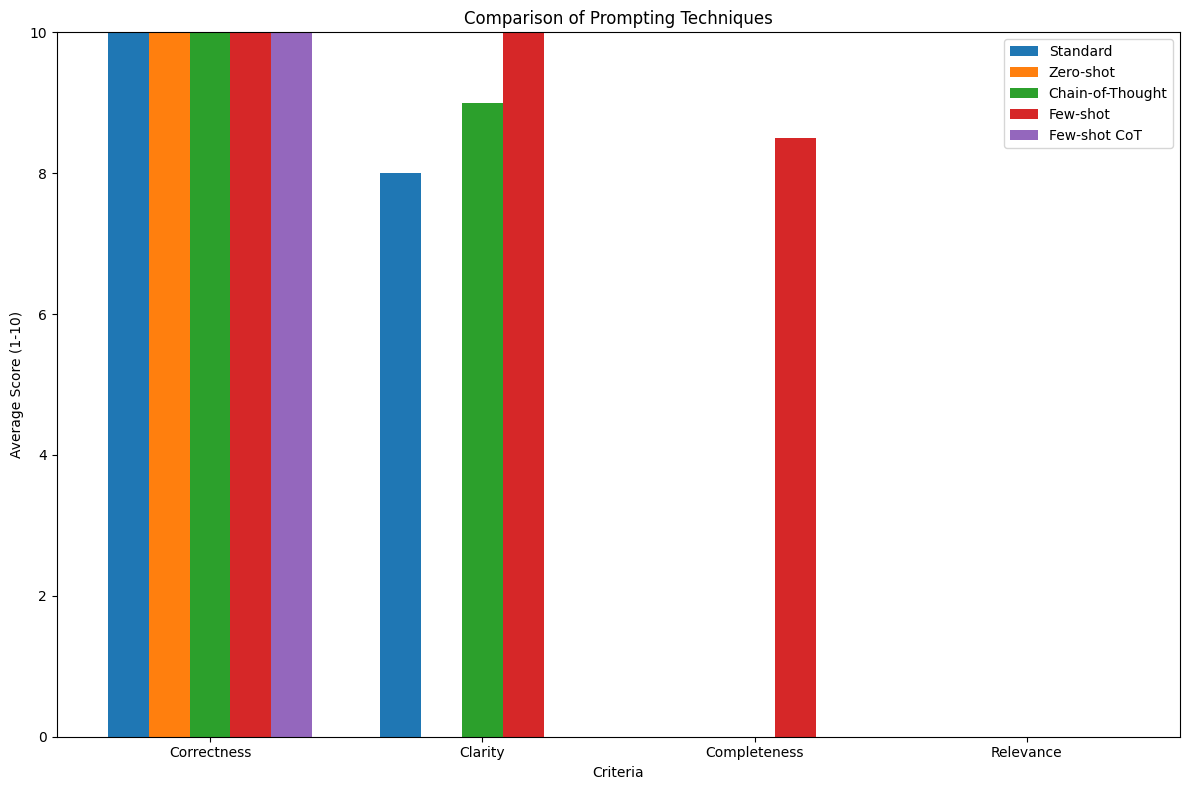

In [ ]:
# Suppose `evaluation_results` is a list of results with the key structure:
# {'metrics': {'llm_evaluation': "Standard: 8/10, Clarity: 7/10, ..." }}

plot_evaluation_results(evaluation_results)
